## Setup

In [1]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.mapping.orbele import itmap
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf

## 2.5PN

## Vary $r_\text{tide}$, fixed $P_\text{true}$

In [3]:
mWD = 0.5*msun
mBH = 1e5*msun
Torb = 15.*3600
Torb = 9.*3600
a_fixed = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)
rp_list = np.linspace(1.2,6.5,2000)*rt

w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2

q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

ntot = 200

In [4]:
print(np.mod(wf(mWD)*Torb,2*np.pi))
print(w_list1, olap_list1)
print(m1/m2/r1*2*a_fixed)

4.665580178682767
[0.34203460730667573] [0.24299202102630496]
0.06648528300408899


In [5]:
maxE = np.zeros(len(rp_list))
E1_k = np.zeros(len(rp_list))
dphase1 = np.zeros(len(rp_list))
for i in range(len(rp_list)):
    itsol = itmap()
    a0, e0, ga0 = a_fixed, 1-rp_list[i]/a_fixed, 0.
    itsol.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
                ,'a0':a0, 'e0':e0, 'ga0':ga0}
    itsol.flag_1pn = False
    itsol.flag_2_5pn = False
    itsol.flag_redshift = False
    itsol.flag_dq_cal = False
    itsol.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
    itsol.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

    itsol.map2(ntot)
    itsol.one_dphase()
    
    maxE[i] = np.max(np.abs(itsol.E1n))
    E1_k[i] = np.abs(itsol.E1n[1])
    dphase1[i] = itsol.dphase1[0]

In [6]:
maxE_pn = np.zeros(len(rp_list))
E1_pn = np.zeros(len(rp_list))
for i in range(len(rp_list)):
    itsol_pn = itmap()
    rp = rp_list[i]
    a0, e0, ga0 = a_fixed, 1-rp_list[i]/a_fixed, 0.
    itsol_pn.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
                ,'a0':a0, 'e0':e0, 'ga0':ga0}
    itsol_pn.flag_1pn = False
    itsol_pn.flag_2_5pn = True
    itsol_pn.flag_redshift = False
    itsol_pn.flag_dq_cal = False
    itsol_pn.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
    itsol_pn.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

    itsol_pn.map2(ntot)

    maxE_pn[i] = np.max(np.abs(itsol_pn.E1n))
    E1_pn[i] = np.abs(itsol_pn.E1n[1])

In [7]:
maxE_pn_notide = np.zeros(len(rp_list))
E1_pn_notide = np.zeros(len(rp_list))
dphase1_notide = np.zeros(len(rp_list))
for i in range(len(rp_list)):
    itsol_pn_notide = itmap()
    rp = rp_list[i]
    a0, e0, ga0 = a_fixed, 1-rp_list[i]/a_fixed, 0.
    itsol_pn_notide.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
                ,'a0':a0, 'e0':e0, 'ga0':ga0}
    itsol_pn_notide.flag_1pn = False
    itsol_pn_notide.flag_2_5pn = True
    itsol_pn_notide.flag_redshift = False
    itsol_pn_notide.flag_dq_cal = False
    itsol_pn_notide.flag_tide_reaction = False
    itsol_pn_notide.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
    itsol_pn_notide.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

    itsol_pn_notide.map2(ntot)
    itsol_pn_notide.one_dphase()

    maxE_pn_notide[i] = np.max(np.abs(itsol_pn_notide.E1n))
    E1_pn_notide[i] = np.abs(itsol_pn_notide.E1n[1])
    
    dphase1_notide[i] = itsol_pn_notide.dphase1[0]

### Finding $r_\text{p, crit}$

In [8]:
idx = (np.abs(np.abs(dphase1) - 1.)).argmin()
rp_crit_0pn = rp_list[idx]

phi0 = np.mod(w_list1[0]*Torb,2*np.pi)
idx = (np.abs(dphase1_notide*ntot + phi0 )).argmin()
rp_crit_GW_ntot = rp_list[idx]

### Finding $E_*/E_0$

In [9]:
Estar = (m1/m2)/r1*2*a0
print(Estar)

0.06648528300408899


## Output figures

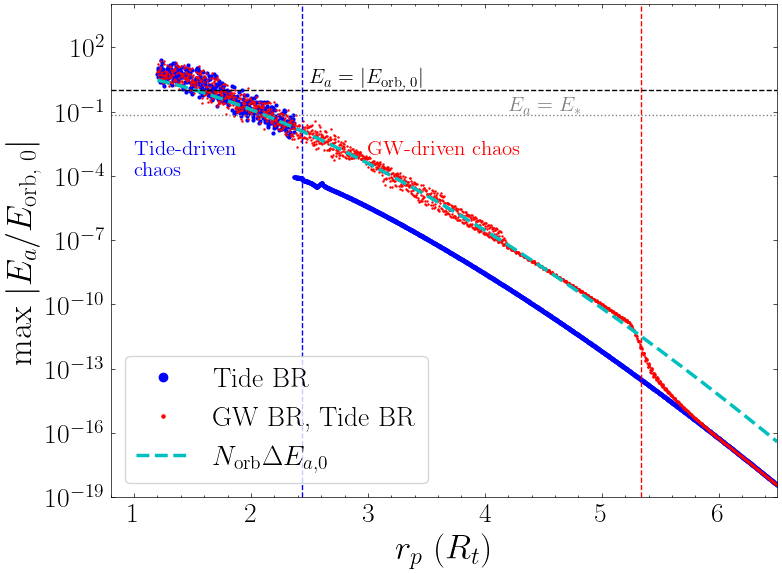

In [10]:
xrange = [0.8, 6.5]
yrange = [1.e-19, 1.e4]
# textpos = [3.,2.e0]

plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(rp_list/rt, maxE/(G*(m1+m2)/2/a0), 'b.', markersize = 4.0, label=r'Tide BR')
plt.plot(rp_list/rt, maxE_pn/(G*(m1+m2)/2/a0), 'r.', markersize = 1.5, label=r'GW BR, Tide BR')
plt.axvline(rp_crit_0pn/rt, color = 'b', linestyle = 'dashed')
plt.axvline(rp_crit_GW_ntot/rt, color = 'r', linestyle = 'dashed')
plt.plot(rp_list/rt, ntot*E1_k/(G*(m1+m2)/2/a0), 'c--', linewidth = 2.5, label=r'$N_\text{orb} \Delta E_{{a}, 0}$')

# plt.fill_between(xrange,1., yrange[1], color = 'lightgray')
# plt.text(x=textpos[0],y=textpos[1],s=r'$E_a > |E_\text{orb, 0}|$', fontsize = 20)

plt.axhline(1., color = 'black', linestyle = 'dashed')
plt.axhline(Estar, color = 'gray', linestyle = 'dotted')
plt.text(x=2.5,y=2.e0,s=r'$E_a = |E_\text{orb, 0}|$', fontsize = 15)
plt.text(x=4.2,y=1.e-1,s=r'$E_a = E_*$', fontsize = 15, color = 'gray')


plt.text(x=1.,y=1.e-4,s='Tide-driven \n chaos', fontsize = 15, color = 'blue')
plt.text(x=3.,y=1.e-3,s=r'GW-driven chaos', fontsize = 15, color = 'red')

# plt.title(r'Max $f$-mode energy over %d orbits, ($m_1$, $m_2$) = (%1.2e, %1.2e) $M_\odot$, $T_\text{orb}$ = %1.2f hr'%(ntot, m1/msun, m2/msun, Torb/3600))
plt.xlabel(r'$r_p$ ($R_t$)',fontsize=25)
plt.ylabel(r'max $|E_a/E_\text{orb, 0}|$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(xrange)
plt.ylim(yrange)
plt.yscale('log')
plt.legend(fontsize = 20, loc = 'lower left', frameon = True, markerscale = 3.)
plt.savefig("max_Emode_vs_rp.pdf", format="pdf")
plt.show()
plt.close()